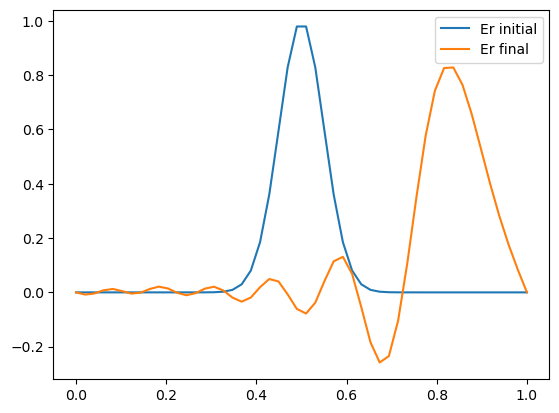

In [15]:
import numpy as np
import matplotlib.pyplot as plt

a = 1 # length simulation box
pulse_width = 0.05
nx = 50 # number of grid points
dx = a/nx # grid spacing
dt = (0.9)*dx # time step
c = 1 # speed of light in vacuum

# number of time steps
nt = 1000

xn = np.linspace(0,a,nx)

# initialize Er
Er0 = np.zeros(nx)
Er1 = np.zeros(nx)
Er  = np.zeros(nx)

# Gaussian Pulse
Er0 = np.exp(-((xn - a/2)**2) / (2 * pulse_width**2))
Er1 = np.exp(-((xn - (a/2 + c * dt))**2) / (2 * pulse_width**2))

plt.plot(xn,Er0, label='Er initial')

for it in range(1,nt):
  # bc 
  Er[0] = 0.0
  Er[-1] = 0.0 
  for ix in range(1,nx-1):
    Er[ix] = 2.0*Er1[ix] - Er0[ix] + (c*dt/dx)* (c*dt/dx)* (Er1[ix-1] -2*Er1[ix] + Er1[ix+1])

  Er0[:] = Er1[:]
  Er1[:] = Er[:]
  
plt.plot(xn,Er, label='Er final')
plt.legend()
plt.show()